# AoA - AR Optimisation

This is the first step towards a more complicated optimisation problem, it will optimise the induced drag for a lift = Weight constraint and will only try to optimise a single parameter: Aspect Ratio

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.interpolate import RBFInterpolator
from scipy.interpolate import Rbf
from scipy.optimize import fsolve

In [45]:
# Import the surrogates and check they are well built
surrogate_dir = '/home/pablodfs/FYP/Projects-SHARPy/aeroelasticPMOR_Optimization/surrogate_model/surrogate_built'
optimisation_dir = '/home/pablodfs/FYP/Projects-SHARPy/aeroelasticPMOR_Optimization/optimisation'
os.chdir(surrogate_dir)

lift_pandas = pd.read_csv('lift_surrogate_v1.csv')
drag_pandas = pd.read_csv('drag_surrogate_v1.csv')

# Go back to the initial directory
os.chdir(optimisation_dir)

In [46]:
lift_pandas.head()
lift_numpy = lift_pandas.to_numpy()
drag_numpy = drag_pandas.to_numpy()

lift_theta = lift_numpy[:,2]
drag_theta = drag_numpy[:,2]
# Store in column matrix form
lift_theta = np.matrix(lift_theta).T
drag_theta = np.matrix(drag_theta).T

In [47]:
# Evaluate the surrogate model to check it is correct
# First the lift
# For that need the surrogate functions:

In [48]:
def polynomial_basis2D(x,y,kx,ky):
    """Evaluates a vector using a kth degree polynomial in two directions.

    Args:
        x (np.array): Vector of points to be evaluated 
        y (np.array): Vector of points to be evaluated
        kx     (int): Degree polynomial in variable x
        ky     (int): Degree polynomial in varibale y
    Returns:
        b (np.array): 2D array with evaluations of x,y for every point

    """
    num = x.size
    num2 = y.size
    if num != num2:
        print('Vectors x and y must be the same size')
    else:
        b = np.zeros([num,(kx+1)*(ky+1)])
        for k in range(num):
            counter = 0
            for i in range(kx+1):
                for j in range(ky+1):
                    b[k,counter] = x[k]**(i)*y[k]**(j)
                    counter+=1
    return b


In [49]:
def eval_surrogate(theta,x,y,kx,ky):
    """ Function which evaluates the surrogate function

    Args:
        x (np.array): Points at which surrogate output is seeked
        y (np.array): Second dimension of points to evaluate surrogate at
        kx     (int): Degree polynomial in variable x
        ky     (int): Degree polynomial in varibale y
    Returns
        f (np.array): Evaluations of the surrogate
    """
    f = np.zeros([len(x), ])
    params = theta
    for i in range(len(x)):
        btest = polynomial_basis2D(np.array([x[i]]),np.array([y[i]]),kx,ky)
        f[i] = np.dot(btest, params)

    return f


In [50]:
kx_lift = 2
ky_lift = 3

AR = np.linspace(20,44,7)
xp = np.linspace(0,3.6,100)
yp0 = AR[0]*np.ones(xp.shape)
yp1 = AR[1]*np.ones(xp.shape)
yp2 = AR[2]*np.ones(xp.shape)
yp3 = AR[3]*np.ones(xp.shape)
yp4 = AR[4]*np.ones(xp.shape)
yp5 = AR[5]*np.ones(xp.shape)
yp6 = AR[6]*np.ones(xp.shape)

lift0surr = eval_surrogate(lift_theta,xp,yp0,kx_lift,ky_lift)
lift1surr = eval_surrogate(lift_theta,xp,yp1,kx_lift,ky_lift)
lift2surr = eval_surrogate(lift_theta,xp,yp2,kx_lift,ky_lift)
lift3surr = eval_surrogate(lift_theta,xp,yp3,kx_lift,ky_lift)
lift4surr = eval_surrogate(lift_theta,xp,yp4,kx_lift,ky_lift)
lift5surr = eval_surrogate(lift_theta,xp,yp5,kx_lift,ky_lift)
lift6surr = eval_surrogate(lift_theta,xp,yp6,kx_lift,ky_lift)

(375.0, 460.0)

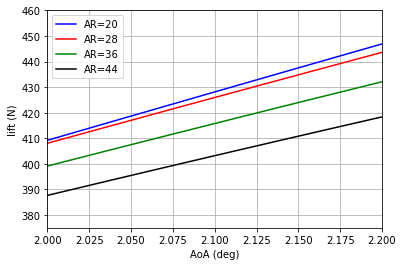

In [105]:
fig1, ax = plt.subplots()

ax.plot(xp,lift0surr,'b-')

ax.plot(xp,lift2surr,'r-')

ax.plot(xp,lift4surr,'g-')

ax.plot(xp,lift6surr,'k-')

ax.legend(["AR=20","AR=28","AR=36","AR=44"])
ax.grid(True)
ax.set_ylabel('lift (N)')
ax.set_xlabel('AoA (deg)')
ax.set_xlim([2.0,2.2])
ax.set_ylim([375,460])
# ax.set_xlim([1.0,1.2])
# ax.set_ylim([210,260])


In [52]:
kx_drag = 3
ky_drag = 3

drag0surr = eval_surrogate(drag_theta,xp,yp0,kx_drag,ky_drag)
drag1surr = eval_surrogate(drag_theta,xp,yp1,kx_drag,ky_drag)
drag2surr = eval_surrogate(drag_theta,xp,yp2,kx_drag,ky_drag)
drag3surr = eval_surrogate(drag_theta,xp,yp3,kx_drag,ky_drag)
drag4surr = eval_surrogate(drag_theta,xp,yp4,kx_drag,ky_drag)
drag5surr = eval_surrogate(drag_theta,xp,yp5,kx_drag,ky_drag)
drag6surr = eval_surrogate(drag_theta,xp,yp6,kx_drag,ky_drag)

Text(0.5, 0, 'AoA (deg)')

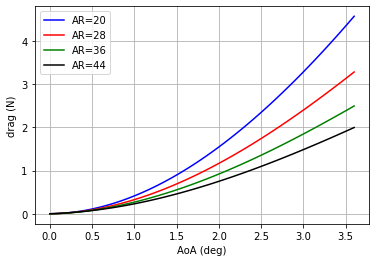

In [53]:
fig2, ax = plt.subplots()

ax.plot(xp,drag0surr,'b-')

ax.plot(xp,drag2surr,'r-')

ax.plot(xp,drag4surr,'g-')

ax.plot(xp,drag6surr,'k-')

ax.legend(["AR=20","AR=28","AR=36","AR=44"])
ax.grid(True)
ax.set_ylabel('drag (N)')
ax.set_xlabel('AoA (deg)')

## Optimise the AR for drag
Each AR will have an equilibrium AoA, therefore each AR has a drag

## Weight of the aircraft

In [54]:
def weight(w0,w1,AR):
    weight = w0+w1*np.sqrt(AR)
    return weight

In [55]:
w0 = 4.25
w1 = 3*np.sqrt(2)
aircraft_weight = weight(w0,w1,32)
print('Initial aircraft weight = {0:1.2f}'.format(aircraft_weight),'kg')

Initial aircraft weight = 28.25 kg


In [73]:
def equilibrium(AoA_deg,*data):
    AR, lift_theta, kx_lift, ky_lift, w0, w1 = data   # automatic unpacking
    residual = eval_surrogate(lift_theta,np.array([AoA_deg]),np.array([AR]),kx_lift,ky_lift)-9.8*weight(w0,w1,AR)
    return residual

In [82]:
# Solve for AoA
AR_p = np.linspace(20,44,100)
AoA_deg_p = np.zeros(AR_p.shape)
# Constants for the problem
u_inf = 10.  # m/s
Sref = 32.   # m^2
rho = 1.225  # kg/m^3
dCldAlpha = 2*np.pi
for i in range(len(AR_p)):
    data = (AR_p[i], lift_theta, kx_lift,ky_lift, w0, w1)
    AoA_deg0 = (weight(w0,w1,AR_p[i])*9.8/(0.5*rho*u_inf**2*Sref*dCldAlpha))*180/np.pi
    AoA_deg_p[i] = fsolve(equilibrium,AoA_deg0,args=data)
print(AoA_deg_p)


[1.07704317 1.081596   1.08614129 1.09068003 1.09521316 1.09974161
 1.10426625 1.10878797 1.1133076  1.11782597 1.12234385 1.12686203
 1.13138126 1.13590225 1.14042574 1.14495239 1.14948288 1.15401786
 1.15855797 1.16310383 1.16765602 1.17221514 1.17678174 1.18135639
 1.18593962 1.19053194 1.19513386 1.19974589 1.20436848 1.20900211
 1.21364723 1.21830427 1.22297366 1.22765581 1.23235112 1.23705996
 1.24178272 1.24651975 1.2512714  1.25603801 1.26081989 1.26561736
 1.27043071 1.27526024 1.2801062  1.28496888 1.2898485  1.29474532
 1.29965955 1.3045914  1.30954108 1.31450876 1.31949463 1.32449884
 1.32952154 1.33456286 1.33962292 1.34470184 1.3497997  1.35491658
 1.36005254 1.36520765 1.37038193 1.37557541 1.38078809 1.38601997
 1.39127101 1.39654119 1.40183044 1.4071387  1.41246587 1.41781185
 1.42317651 1.42855972 1.43396131 1.43938111 1.44481893 1.45027456
 1.45574775 1.46123825 1.46674581 1.47227011 1.47781085 1.4833677
 1.4889403  1.49452827 1.50013121 1.50574871 1.51138031 1.51702

Text(0.5, 0, 'AR')

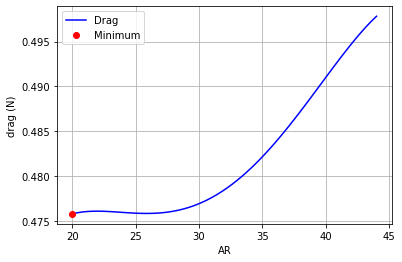

In [93]:
# Now plot the induced drag and find the minimum of it:
drag_p = eval_surrogate(drag_theta,AoA_deg_p,AR_p,kx_drag,ky_drag)
# Find the minimum drag point:
min_drag = np.amin(drag_p)
min_drag_i = np.argmin(drag_p)
fig3, ax = plt.subplots()

ax.plot(AR_p,drag_p,'b-')
ax.plot(AR_p[min_drag_i],min_drag,'ro')

ax.legend(['Drag','Minimum'])
ax.grid(True)
ax.set_ylabel('drag (N)')
ax.set_xlabel('AR')

Text(0.5, 0, 'AR')

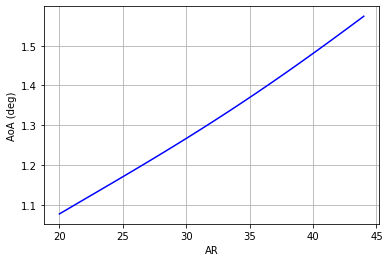

In [94]:
fig4, ax = plt.subplots()

ax.plot(AR_p,AoA_deg_p,'b-')

ax.grid(True)
ax.set_ylabel('AoA (deg)')
ax.set_xlabel('AR')

In [97]:
wingEmptyWeightRatio = w1*np.sqrt(AR_p)/weight(w0,w1,AR_p)

Text(0.5, 0, 'AR')

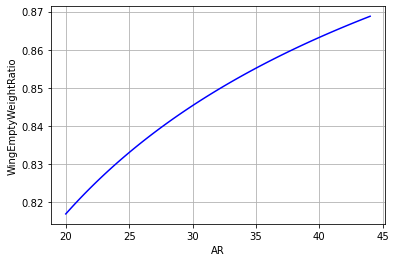

In [98]:
fig5, ax = plt.subplots()

ax.plot(AR_p,wingEmptyWeightRatio,'b-')

ax.grid(True)
ax.set_ylabel('WingEmptyWeightRatio')
ax.set_xlabel('AR')

In [113]:
# Preform optimisation at a higher weight
w0_1 = 4.25+5
# Solve for AoA
AoA_deg_p1 = np.zeros(AR_p.shape)
# Constants for the problem
u_inf = 10.  # m/s
Sref = 32.   # m^2
rho = 1.225  # kg/m^3
dCldAlpha = 2*np.pi
for i in range(len(AR_p)):
    data = (AR_p[i], lift_theta, kx_lift,ky_lift, w0_1, w1)
    AoA_deg0 = (weight(w0_1,w1,AR_p[i])*9.8/(0.5*rho*u_inf**2*Sref*dCldAlpha))*180/np.pi
    AoA_deg_p1[i] = fsolve(equilibrium,AoA_deg0,args=data)


In [114]:
# Preform optimisation at a higher weight
w0_2 = 4.25+10
# Solve for AoA
AoA_deg_p2 = np.zeros(AR_p.shape)
# Constants for the problem
u_inf = 10.  # m/s
Sref = 32.   # m^2
rho = 1.225  # kg/m^3
dCldAlpha = 2*np.pi
for i in range(len(AR_p)):
    data = (AR_p[i], lift_theta, kx_lift,ky_lift, w0_2, w1)
    AoA_deg0 = (weight(w0_2,w1,AR_p[i])*9.8/(0.5*rho*u_inf**2*Sref*dCldAlpha))*180/np.pi
    AoA_deg_p2[i] = fsolve(equilibrium,AoA_deg0,args=data)

In [115]:
# Preform optimisation at a higher weight
w0_3 = 4.25+15
# Solve for AoA
AoA_deg_p3 = np.zeros(AR_p.shape)
# Constants for the problem
u_inf = 10.  # m/s
Sref = 32.   # m^2
rho = 1.225  # kg/m^3
dCldAlpha = 2*np.pi
for i in range(len(AR_p)):
    data = (AR_p[i], lift_theta, kx_lift,ky_lift, w0_3, w1)
    AoA_deg0 = (weight(w0_3,w1,AR_p[i])*9.8/(0.5*rho*u_inf**2*Sref*dCldAlpha))*180/np.pi
    AoA_deg_p3[i] = fsolve(equilibrium,AoA_deg0,args=data)

In [116]:
# Now plot the induced drag and find the minimum of it:
drag_p1 = eval_surrogate(drag_theta,AoA_deg_p1,AR_p,kx_drag,ky_drag)
drag_p2 = eval_surrogate(drag_theta,AoA_deg_p2,AR_p,kx_drag,ky_drag)
drag_p3 = eval_surrogate(drag_theta,AoA_deg_p3,AR_p,kx_drag,ky_drag)

# Find the minimum drag point:
min_drag1 = np.amin(drag_p1)
min_drag1_i = np.argmin(drag_p1)

min_drag2 = np.amin(drag_p2)
min_drag2_i = np.argmin(drag_p2)

min_drag3 = np.amin(drag_p3)
min_drag3_i = np.argmin(drag_p3)



Text(0.5, 0, 'AR')

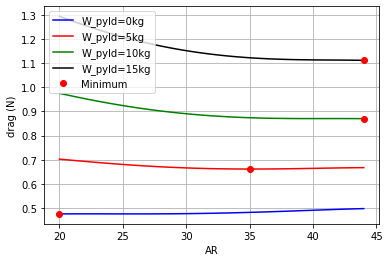

In [118]:
fig6, ax = plt.subplots()


ax.plot(AR_p,drag_p,'b-')
ax.plot(AR_p[min_drag_i],min_drag,'ro',label='_nolegend_')

ax.plot(AR_p,drag_p1,'r-')
ax.plot(AR_p[min_drag1_i],min_drag1,'ro',label='_nolegend_')

ax.plot(AR_p,drag_p2,'g-')
ax.plot(AR_p[min_drag2_i],min_drag2,'ro',label='_nolegend_')

ax.plot(AR_p,drag_p3,'k-')
ax.plot(AR_p[min_drag3_i],min_drag3,'ro')

ax.legend(['W_pyld=0kg','W_pyld=5kg','W_pyld=10kg','W_pyld=15kg','Minimum'])
ax.grid(True)
ax.set_ylabel('drag (N)')
ax.set_xlabel('AR')